## 1. Dataset Creation

In [1]:
pip freeze

absl-py==1.4.0
aiofiles==22.1.0
aiosqlite==0.19.0
anyio==3.6.2
appdirs==1.4.4
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==5.3.0
certifi==2022.12.7
cffi==1.15.1
chardet==5.1.0
charset-normalizer==3.1.0
click==7.1.2
comm==0.1.3
contourpy==1.0.7
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
Deprecated==1.2.13
executing==1.2.0
fastjsonschema==2.16.3
ffmpeg-python==0.2.0
flatbuffers==23.5.9
fonttools==4.39.3
fqdn==1.5.1
future==0.18.3
gast==0.4.0
google-auth==2.18.0
google-auth-oauthlib==1.0.0
google-pasta==0.2.0
grpcio==1.54.0
h11==0.12.0
h2==4.1.0
h5py==3.8.0
hpack==4.0.0
httpcore==0.13.7
httpx==0.19.0
hyperframe==6.0.1
idna==3.4
ipykernel==6.22.0
ipython==8.13.0
ipython-genutils==0.2.0
isoduration==20.11.0
jams==0.3.4
jax==0.4.10
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
json5==0.9.11
jsonpointe

In [2]:
%load_ext autoreload
%autoreload 2

This notebook should serve as a guide to the creation of your Carnatic Music Instrument dataset. We will start with the loading of the dataset using the mirdata API, extract the relevant sections and instruments, apply any relevant processing steps, and store the dataset in an intuitive and accessible format.

Typical Carnatic Music ensembles contain a wide-range of instruments. For this task we are going to focus on:

- Voice
- Violin
- Mridangam

You can refer to the instrumentation section of the [compIAM tutorial](https://mtg.github.io/IAM-tutorial-ismir22/indian_art_music/carnatic-music.html) for more information.

The final dataset will be a collection of short audios corresponding to each of these instruments. They will be organised such that each can be retrieved according to the instrument they contain, the performer, the raga and a unique identifier (for reproducibility later).

It is up to you to fill in each subsection with the relevant code to perform that task. If possible, try and split the sections amongst the project group to work in parallel. When the task is complete, you should try and abstract the code into .py files so that it can be ran without a python notebook.

### Explore Dataset

You can access the Saraga Carnatic dataset using the [mirdata API](https://github.com/mir-dataset-loaders/mirdata). You should already have the dataset downloaded on your machine in the mirdata repository.

In [3]:
pip install mirdata


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mirdata, librosa
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
import IPython.display as ipd

In [5]:
data_home = '/Users/alex/mir_datasets/saraga_carnatic'

In [4]:
# This is my cell for assigning data_home variable correctly,
# please don't delete lol - Roddie
# Also this data_home assignment should work for all of you
# since this address goes through the shared drive which
# we all have access to

from google.colab import drive
drive.mount('/content/drive')
data_home = 'drive/Shareddrives/TTM - GROUP 4/saraga1.5_carnatic'

ModuleNotFoundError: No module named 'google.colab'

In [6]:
saraga = mirdata.initialize('saraga_carnatic', data_home=data_home)

You can choose a random track using `.choice_track()`. This returns a Track object.

In [7]:
example_track = saraga.choice_track()

You can load all tracks and information to a dict using `.load_tracks()`

In [8]:
all_tracks = saraga.load_tracks()

This returns a dict of `unique track identifier` : `track` object for each track.

Track objects contain all filepaths of audios and metadata associated with the chosen track, and some information related to the recording itself (such as artist names and instruments). Remember, that for many recordings, we have 4 audio files relevant to our task...


The path of the final mixed performance:

In [9]:
example_track.audio_path

'/Users/alex/mir_datasets/saraga_carnatic/saraga1.5_carnatic/Manda Sudharani at Arkay by Manda Sudharani/Giriraja Suta/Giriraja Suta.mp3.mp3'

The path of the vocal microphone:

In [10]:
example_track.audio_vocal_path

'/Users/alex/mir_datasets/saraga_carnatic/saraga1.5_carnatic/Manda Sudharani at Arkay by Manda Sudharani/Giriraja Suta/Giriraja Suta.multitrack-vocal.mp3'

The path of the violin microphone:

In [11]:
example_track.audio_violin_path

'/Users/alex/mir_datasets/saraga_carnatic/saraga1.5_carnatic/Manda Sudharani at Arkay by Manda Sudharani/Giriraja Suta/Giriraja Suta.multitrack-violin.mp3'

And two mridangam microphones (one for each head):

In [12]:
example_track.audio_mridangam_left_path

'/Users/alex/mir_datasets/saraga_carnatic/saraga1.5_carnatic/Manda Sudharani at Arkay by Manda Sudharani/Giriraja Suta/Giriraja Suta.multitrack-mridangam-left.mp3'

In [13]:
example_track.audio_mridangam_right_path

'/Users/alex/mir_datasets/saraga_carnatic/saraga1.5_carnatic/Manda Sudharani at Arkay by Manda Sudharani/Giriraja Suta/Giriraja Suta.multitrack-mridangam-right.mp3'

Navigate to these files and listen to the audios. What do you notice about them? Are they the same intensity? Is there any undesirable artifacts such as leaking or noise?

Take note, the `mirdata` `Track` object will not have a `audio_vocal_path` (or vocal or mridangam) attribute if for the given track there is no multi-microphone recordings. Can you use this information to determine how many tracks we have multi-microphone recordings for? (HINT: You can check if an object has a specific attribute using the hasattr function: `hasattr(obj, "<attribute_to_check_for>")`.

In [14]:
# How many tracks with multitrack recordings?

Another important path is the metadata_path:

In [15]:
metadata_path = example_track.metadata_path

Here you will find information relating to the recording such as artist names, instruments, raaga.

Can you create some functions to explore these tracks and metadata? Perhaps it would be useful to know that JSON can be loaded in python using the `json` library:

In [16]:
import json

with open(metadata_path, 'r') as f:
    loaded_json = json.loads(f.read())

In [17]:
loaded_json

{'mbid': '92919a49-6cde-4498-bea5-809587bae9b0',
 'title': 'Giriraja Suta',
 'length': 342000,
 'artists': [{'artist': {'mbid': 'd2bb8df3-110d-4936-bb81-f356753ce1ef',
    'name': 'Manda Sudharani'},
   'instrument': {'mbid': 'd92884b7-ee0c-46d5-96f3-918196ba8c5b',
    'name': 'Voice'},
   'lead': True,
   'attributes': ''}],
 'raaga': [],
 'taala': [],
 'form': [],
 'work': [{'mbid': 'ffecc2ad-8e6c-4474-9f4f-39ca64876187',
   'title': 'Giriraja suta tanaya sadaya'}],
 'concert': [{'mbid': '8526bb0c-e5f1-45f6-bed2-d09d7ef8af54',
   'title': 'Manda Sudharani at Arkay'}],
 'album_artists': [{'mbid': 'd2bb8df3-110d-4936-bb81-f356753ce1ef',
   'name': 'Manda Sudharani'}]}

In [18]:
def get_metadata(track_id):
    """
    For <track_id>, return a dataframe of associated metadata
    """
    # code here
    metadata = saraga.track(track_id).metadata
    
    return metadata

def get_performer(track_id):
    """
    For <track_id>, return the performer
    """
    # code here
    performer = saraga.track(track_id).metadata['artists']
    return performer

def get_performance(track_id):
    """
    For <track_id>, return the performance name
    """
    # code here
    performance = saraga.track(track_id).metadata['title']
    return performance

def get_raga(track_id):
    """
    For <track_id>, return the raga name
    """
    # code here
    raga = saraga.track(track_id).metadata['raaga']
    return raga


def get_tonic(track_id):
    """
    For <track_id>, return the tonic in hertz
    """
    # code here
    tonic = saraga.track(track_id).tonic
    return tonic

How many ragas/performers/performances are available? How does that breakdown across performances for which we have multi-track recordings and those we dont?

In [19]:
# get dataset statistics
key = '49_Shankari_Shankuru'
get_metadata(key)
get_performer(key)
get_performance(key)
get_raga(key)
get_tonic(key)

195.997718

In [20]:
track = saraga.track(key)
track

Track(
  audio_ghatam_path="...kkarai Sisters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.multitrack-ghatam.mp3",
  audio_mridangam_left_path="...isters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.multitrack-mridangam-left.mp3",
  audio_mridangam_right_path="...sters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.multitrack-mridangam-right.mp3",
  audio_path="...1.5_carnatic/Akkarai Sisters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.mp3.mp3",
  audio_violin_path="...kkarai Sisters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.multitrack-violin.mp3",
  audio_vocal_path="...Akkarai Sisters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.multitrack-vocal.mp3",
  audio_vocal_s_path="...karai Sisters at Arkay by Akkarai Sisters/Shankari Shankuru/Shankari Shankuru.multitrack-vocal-s.mp3",
  ctonic_path="..._carnatic/Akkarai Sisters at Arkay by Akkarai Sisters/Shankari Shankuru/Shan

### Load Audio

The mirdata API returns paths to audio files associated with each track. Can you create some loaders to load an audio based on a given track name? 

**Hint**: The `librosa` library contains functions to load audio from file to an array of amplitude values. `y, sr = librosa.load(audio_path, sr=44100)`. `sr` in this instance refers to the sampling rate of the audio, i.e. how many individual amplitude energy values there are per second (typically 44100Hz). It is important to remember this resolution when converting between number of elements in the returned array and time in the track.

In [21]:
def load_mixed_audio(track_id):
    """
    For <track_id>, return the loaded audio
    """
    # code here
    audio_path = saraga.track(track_id).audio_path
    audio_array, sr = librosa.load(audio_path, sr=44100)
    return audio_array

def load_violin_audio(track_id):
    """
    For <track_id>, return the isolated violin track
    """
    # code here
    audio_path = saraga.track(track_id).audio_violin_path
    audio_array, sr = librosa.load(audio_path, sr=44100)
    return audio_array

def load_voice_audio(track_id):
    """
    For <track_id>, return the isolated voice track
    """
    # code here
    audio_path = saraga.track(track_id).audio_vocal_path
    audio_array, sr = librosa.load(audio_path, sr=44100)
    return audio_array

def load_mridangam_audio_right(track_id):
    """
    For <track_id>, return the isolated mridangam track
    """
    # code here
    
    audio_path = saraga.track(track_id).audio_mridangam_right_path
    audio_array_right, sr_right = librosa.load(audio_path, sr=44100)
    
    audio_array = audio_array_right
    
    return audio_array

def load_mridangam_audio_left(track_id):
    """
    For <track_id>, return the isolated mridangam track
    """
    # code here
    audio_path = saraga.track(track_id).audio_mridangam_left_path
    audio_array_left, sr_left = librosa.load(audio_path, sr=44100)
    
    audio_array = audio_array_left
    
    return audio_array

In [22]:
load_mixed_audio(key)
load_violin_audio(key)
load_voice_audio(key)
load_mridangam_audio_left(key)
load_mridangam_audio_right(key)

array([-1.4325141e-04, -5.7960569e-06,  1.7130947e-04, ...,
       -5.0273575e-03, -6.3527292e-03, -6.4144167e-03], dtype=float32)

### Listen to Audio

Let's write some functions to listen and visualise these audio arrays in the notebook. 

**Hint**: You should find that the `Ipythoon.display.Audio` useful for playing audio inline in a Jupyter notebook.

**Hint2**: Using the `matplotlib` library you can plot on two dimensions as so:

```
import matplotlib.pyplot as plt

plt.plot(x, y)
```
More information on enhancing these plots (e.g. with titles, axis labels and gridlines) can be found [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html).

In [23]:
def plot_waveform(audio_array):
    """
    Plot waveform for <audio_array> using matplotlib.pyplot
    """
    plt.plot(audio_array)


def play_audio(audio_array):
    """
    Generate audio player for <audio_array> using Ipython library
    """
    sf.write('aux_audio.wav', audio_array, 44100)
    return ipd.Audio('aux_audio.wav')
    

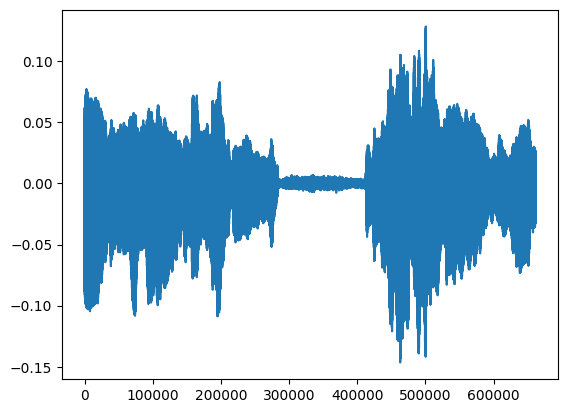

In [24]:
x1 = 90*44100 #1:30
x2 = 105*44100 #1:45
key = '49_Shankari_Shankuru'
plot_waveform(load_voice_audio(key)[x1:x2])

In [25]:
play_audio(load_mridangam_audio_right(key)[x1:x2])

Are there any important observations about the mixed or isolated instrument tracks? What is the quality like, do you here all of the instruments clearly? Are there any differences between the audios of the individual instrument tracks?

### Processing

Are the isolated vocal tracks sufficiently isolated? Libraries like [`spleeter`](https://github.com/deezer/spleeter) can help separate singing sources from background instruments. Does it help here?

In [26]:
pip install spleeter


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
import os
from spleeter.separator import Separator

2023-05-21 14:05:14.249308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# Make sure to have installed ffmpeg in order to execute the following function
def separate_voice(audio_path, isolated_audio_output_path):
    """
    Apply spleeter source separation to input audio
    """
    separator = Separator('spleeter:2stems')  # Use 'spleeter:4stems' for separating vocals, bass, drums, and other.
    
    # Check if the audio file exists
    if not os.path.isfile(audio_path):
        print(f"Error: '{audio_path}' is not a valid audio file.")
        return
    
    # Create the output directory if it doesn't exist
    os.makedirs(isolated_audio_output_path, exist_ok=True)
    
    # Load the audio file
    audio_input = audio_path
    
    # Separate the audio into vocals and accompaniment
    separator.separate_to_file(audio_input, isolated_audio_output_path)
    
    print("Separation completed successfully.")

In [ ]:
!ls 'drive/Shareddrives/TTM - GROUP 4/saraga1.5_carnatic/saraga1.5_carnatic/Cherthala Ranganatha Sharma at Arkay by Cherthala Ranganatha Sharma/Karuna Nidhi Illalo'

'Karuna Nidhi Illalo.bpm-manual.txt'
'Karuna Nidhi Illalo.ctonic.txt'
'Karuna Nidhi Illalo.json'
'Karuna Nidhi Illalo.mp3.mp3'
'Karuna Nidhi Illalo.mphrases-manual.txt'
'Karuna Nidhi Illalo.multitrack-ghatam.mp3'
'Karuna Nidhi Illalo.multitrack-mridangam-left.mp3'
'Karuna Nidhi Illalo.multitrack-mridangam-right.mp3'
'Karuna Nidhi Illalo.multitrack-violin.mp3'
'Karuna Nidhi Illalo.multitrack-vocal.mp3'
'Karuna Nidhi Illalo.pitch.txt'
'Karuna Nidhi Illalo.pitch-vocal.txt'
'Karuna Nidhi Illalo.sama-manual.txt'
'Karuna Nidhi Illalo.sections-manual-p.txt'
'Karuna Nidhi Illalo.tempo-manual.txt'


In [29]:
# Usage example
audio_path = '/Users/alex/mir_datasets/saraga_carnatic/saraga1.5_carnatic/Cherthala Ranganatha Sharma at Arkay by Cherthala Ranganatha Sharma/Karuna Nidhi Illalo/Karuna Nidhi Illalo.mp3.mp3'
#audio_path = 'drive/Shareddrives/TTM - GROUP 4/saraga1.5_carnatic/saraga1.5_carnatic/Cherthala Ranganatha Sharma at Arkay by Cherthala Ranganatha Sharma/Karuna Nidhi Illalo/Karuna Nidhi Illalo.mp3.mp3'
isolated_audio_output_path = 'isolated_audio/'
separate_voice(audio_path, isolated_audio_output_path)

INFO: Apply unet for vocals_spectrogram
Instructions for updating:
Colocations handled automatically by placer.
INFO: Apply unet for accompaniment_spectrogram
INFO: Restoring parameters from pretrained_models/2stems/model


INFO:spleeter:File isolated_audio/Karuna Nidhi Illalo.mp3/vocals.wav written succesfully
INFO:spleeter:File isolated_audio/Karuna Nidhi Illalo.mp3/accompaniment.wav written succesfully
Separation completed successfully.


How does the quality compare? Does spleeter work effectively? Do we lose any important information?

### Tagging Audio

We want to tag our audios with whether or not a particular instrument is sounding. We can do this by identifying non-silent regions in the isolated tracks and tagging the mixed tracks with the instrument. The `librosa` library contains functionality for identifying silent regions in audio (`librosa.effects.split`).

In [30]:
# Load audios for each instrument track using previously defined functions

In [31]:
# Plot samples of audios (remember the relationship between elements and sampling rate)

Define a function to identify silent regions in an audio array. Look at the documentation for `librosa.effects.split` ([here](https://librosa.org/doc/main/generated/librosa.effects.split.html)). 

**Hint** - The `top_db` parameter tunes the harshness of the cut (a higher value considers louder regions as "silent"). Experiment with this value and compare the results with the audio plots. Do they correspond to what you visualise/hear?
**Remember** - `librosa.effects.split` returns NON-silent intervals.

In [32]:
import numpy as np
import librosa
import numpy as np

track = saraga.choice_track()
print(track.track_id)

# load audio
sr = 44100 # sampling rate
y, sr = librosa.load(track.audio_mridangam_left_path, sr=sr)

235_Janakipathe_Jaya_Karunya_Jaladhe


In [33]:
t1 = 0 # seconds
t2 = 20 # seconds
sample = y

In [34]:
def build_silence_arr(y,
                      top_db,
                      t1=0,
                      t2=len(y)):
  
    sr = 44100
    # sample variable should also be an input of the function
    sample = y[int(t1*sr):int(t2*sr)]

    # identify silence intervals
    out = librosa.effects.split(y=sample, top_db=top_db, frame_length=int(0.1*44100))
    
    # create binarized array
    silence_array = np.zeros(len(sample), int)
    for start, end in out:
        silence_array[start:end] = 1
    return silence_array, top_db

235_Janakipathe_Jaya_Karunya_Jaladhe
Plotting results...


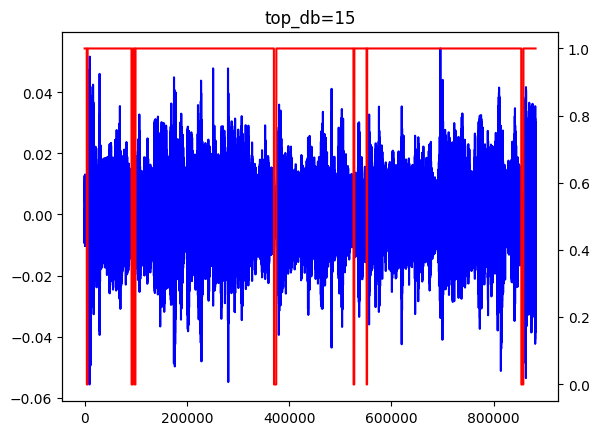

In [40]:
top_db=15

key = track.track_id
track_arr = load_violin_audio(key)
print(key)

silence_array, top_db = build_silence_arr(track_arr, top_db, t1, t2)

sample = track_arr[int(t1*sr):int(t2*sr)]

# plot waveform with silence array
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

print('Plotting results...')
plt.title(f'top_db={top_db}')
ax1.plot(sample, color='blue')
ax2.plot(silence_array, color='red')

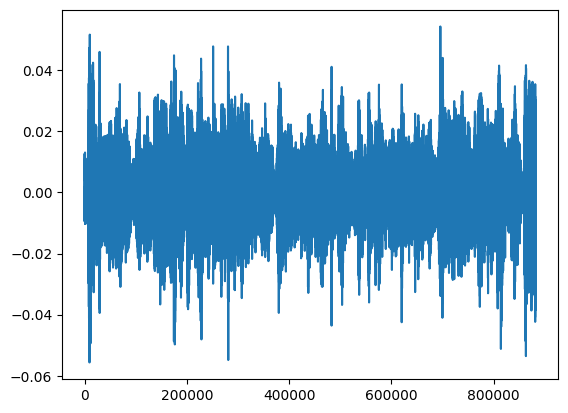

In [41]:
plot_waveform(sample)

In [42]:
play_audio(sample)

Do these regions correspond to what you hear when playing the audio with `play_audio` or what you see with `plot_waveform`?

In [53]:
mridangam_left_array = load_mridangam_audio_left(key)
mridangam_right_array = load_mridangam_audio_right(key) 

y_mridangam_left, top_db = build_silence_arr(mridangam_left_array, t1, t2)
y_mridangam_right, top_db = build_silence_arr(mridangam_right_array, t1, t2)
mridangam = [int(any([x or y] for x, y in zip(y_mridangam_left, y_mridangam_right)))]

### Extracting Samples

We should now have all the tools necessary to load and annotated audio. We now want to extract small snippets of audio  from the mixed tracks across the dataset and annotate each of these snippets as either containing voice, mridangam, violin or none of the above (a single audio should be able to have more than one tag). 

It is important that we have examples for all combinations of tags (violin, voice, mridangam, none). Each sample should be of the same length (what should that length be? think about the two extreme cases of very very short and very long, what problems would arise in each of these cases).

Each sample should have a unique identifier (index). The information relating to their tags should be stored in a metadata DataFrame where you can also find information about the performance.

These should all be saved in individual audio files.

Let us try with just on track to begin with...

1. For a certain track id, load all audio files (mix, violin, etc...)

In [72]:
key = '49_Shankari_Shankuru'
x1 = 0 * 44100
x2 = 20 * 44100
mix_array = load_mixed_audio(key)[x1:x2]
violin_array = load_violin_audio(key)[x1:x2]
vocal_array = load_voice_audio(key)[x1:x2]
mridangam_left_array = load_mridangam_audio_left(key)[x1:x2]
mridangam_right_array = load_mridangam_audio_right(key)[x1:x2]

2. Create a silent/non-silent array using `detect_silence()` defined earlier. 

      **Remember**: The mridangam has two tracks corresponding to it, you must combine them to identify whether either is sounding

In [73]:
top_db = 15

print('Now processing silence in mridangam left...\n')
y_mridangam_left, top_db = build_silence_arr(mridangam_left_array, top_db)
print('Now processing silence in mridangam right...\n')
y_mridangam_right, top_db = build_silence_arr(mridangam_right_array, top_db)
print('Merging them together...\n')
mridangam_silence = [1 if a == 1 or b == 1 else 0 for a, b in zip(y_mridangam_left, y_mridangam_right)]
print('Now processing silence in violin...\n')
violin_silence, top_db = build_silence_arr(violin_array, top_db)
print('Now processing silence in vocal...\n')
vocal_silence, top_db = build_silence_arr(vocal_array, top_db)

Now processing silence in mridangam left...

Now processing silence in mridangam right...

Merging them together...

Now processing silence in violin...

Now processing silence in vocal...



3. Split mixed audio into small chunks using [numpy array indexing](https://numpy.org/doc/stable/user/basics.indexing.html) (the size of these chunks should be informed by the literature)

In [75]:
chunk_size = 5*44100  # Define the desired size of each audio chunk
num_chunks = len(mix_array) // chunk_size
print(num_chunks)

mix_chunks = np.array_split(mix_array, num_chunks)

4


4. Determine from your silent/non-silent arrays in Step 2 whether the chunk contains each instrument (voice, vocal, mridangam

In [76]:
# Slice silence arrays identically to mix slice and determine yes/no does chunk contain instrument
instrument_tags = []

for chunk in mix_chunks:
    start_index = np.where(mix_array == chunk[0])[0][0]
    end_index = start_index + len(chunk)
    
    contains_voice = np.any(vocal_silence[start_index:end_index] == 1)
    contains_violin = np.any(violin_silence[start_index:end_index] == 1)
    contains_mridangam = np.any(mridangam_silence[start_index:end_index] == 1)
    
    instrument_tags.append({
        'index': len(instrument_tags),
        'contains_voice': contains_voice,
        'contains_violin': contains_violin,
        'contains_mridangam': contains_mridangam
    })
instrument_tags

[{'index': 0,
  'contains_voice': True,
  'contains_violin': True,
  'contains_mridangam': False},
 {'index': 1,
  'contains_voice': False,
  'contains_violin': True,
  'contains_mridangam': False},
 {'index': 2,
  'contains_voice': True,
  'contains_violin': True,
  'contains_mridangam': False},
 {'index': 3,
  'contains_voice': True,
  'contains_violin': True,
  'contains_mridangam': False}]

5. Save each audio with a unique index.

    **Hint**: Audio arrays can be saved to file using the `soundfile` library:
    `sf.write('<filename>.wav', <audio_array>, <sampling rate>)`
    
    **Remember**: Each audio chunk  needs to be assigned a unique index so as to be managed correctly later on. Feel free to use numbers, hashes or uuids

In [77]:
# store audio with soundfile
os.makedirs('test/', exist_ok=True)
for i, chunk in enumerate(mix_chunks):
    sf.write('test/'f'{i}.wav', chunk, 44100)

6. Add row to metadata table containing relevant track information, index, and instrument annotations.

    **Hint** - A `pandas` dataframe is a suitable place to store information relating to track and instrument annotations. You can create one using: 

    `import pandas as pd`

    `df = pd.DataFrame(columns=<list of columns names>])`
    
    Add new rows using append:
    
    `df.append({dict of {column_name:value>, ignore_index=True)`
    
    And save using:
    
    `df.to_csv('<path.csv>', index=False)`
    
    **Remember** - This table should include the metadata relating to the track, the unique chunk index and a column indicating whether or not it includes each instrument 
    

In [80]:
# metadata dataframe
import pandas as pd

metadata = pd.DataFrame(instrument_tags)
metadata.to_csv('metadata.csv', index=False)

7. Repeat for many tracks and many chunks. Now you have written the individual code to do this for one track/chunk. Let's combine this and apply to a large number of tracks/chunks. Storing each with a unique index and a row in the metadata dataframe.

### Load Dataset

With our dataset created and saved in an intuitive and accessible format. Let's create some loaders to load the files and get metadata.

In [51]:
import os
import pandas as pd

def load_sample(index):
    """
    Load sample with index, <index>
    """
    # Load the audio file using the index
    audio_path = f'audio_chunk_{index}.wav'
    audio, sr = librosa.load(audio_path, sr=None)
    return audio, sr

def get_metadata(index):
    """
    Get metadata for sample with index, <index>
    """
    # Load the metadata CSV file
    metadata = pd.read_csv('metadata.csv')
    
    # Get the metadata for the specified index
    sample_metadata = metadata.loc[metadata['index'] == index].squeeze()
    return sample_metadata


Typically, when datasets are presented, they are accompanied by some stats detailing their size and constiuent parts. What stats can you tell us about our dataset? Think about: number of seconds, performers, performances, instruments, ragas, filesizes etc.... 

In [55]:
# stats - TO BE FINISHED
metadata = pd.read_csv('metadata.csv')

num_samples = 
num_seconds = 
performers = 
performances = 
instruments = 
ragas = 
file_sizes = 
total_file_size = 

stats = {
    'Number of Samples': num_samples,
    'Total Duration (seconds)': num_seconds,
    'Number of Performers': performers,
    'Number of Performances': performances,
    'Number of Instruments': instruments,
    'Number of Ragas': ragas,
    'Total File Size': total_file_size
}

print(stats)


KeyError: 'artists'

### Reproducible Code

Jupyter notebooks are great for experimenting, especially when visualisation or audio playback is required. However they are not great for reproducibility or source control. Can you abstract the code created here to .py file(s) so that the code can be ran in future without having to load the HTML notebook?